저는 야구에 대해 관심이 많아서 제가 좋아하는 롯데 자이언츠가 왜이리 못할까 라는 생각이 들어 왜 못하는지 분석해보았습니다.
STATIZ라는 사이트에 들어가서 기록들을 CSV로 전환한다음 사용하였습니다.

In [3]:
import pandas as pd
import numpy as np

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import matplotlib.font_manager as fm
import matplotlib as mpl
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

In [5]:
font_name = mpl.font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
mpl.rc('font', family=font_name)

먼저 롯데자이언츠에 대해 보여드리겠습니다.
위키피디아를 활용하여서 롯데자이언츠에대해 판다스로 나타내었습니다.
첫번째항인 lottegiants[0]을 사용하여서 롯데자이언츠의 대한 정보를 나타내었습니다.

In [6]:
lottegiants= pd.read_html('https://ko.wikipedia.org/wiki/%EB%A1%AF%EB%8D%B0_%EC%9E%90%EC%9D%B4%EC%96%B8%EC%B8%A0')
lottegiants[0]

,0,1
0,롯데 자이언츠Lotte Giants,롯데 자이언츠Lotte Giants
1,NaN,NaN
2,회사명,주식회사 롯데자이언츠
3,설립 연도,1975년
4,마스코트,"누리, 피니, 아라"
5,소속 리그,소속 리그
6,1군:KBO 리그2군:KBO 퓨처스리그,1군:KBO 리그2군:KBO 퓨처스리그
7,홈 구장,홈 구장
8,"사직야구장, 울산문수야구장(제2홈구장)","사직야구장, 울산문수야구장(제2홈구장)"
9,이전 홈구장,구덕야구장 (1982년~1985년)마산종합운동장 야구장 (1982년~2010년)


lottegiants[2]를 사용해 롯데 자이언츠의 승 무 패 승률을 알수있습니다.

In [7]:
lottegiants= pd.read_html('https://ko.wikipedia.org/wiki/%EB%A1%AF%EB%8D%B0_%EC%9E%90%EC%9D%B4%EC%96%B8%EC%B8%A0')
lottegiants[2]

,연도,팀명,순위,승,패,무,승률,포스트 시즌,수상 선수,감독
0,1982,롯데,전기 5위 후기 5위,31,49,0,0.388,NaN,NaN,박영길
1,1983,롯데,전기 4위 후기 6위,43,56,1,0.434,NaN,NaN,박영길강병철 (감독 대행)
2,1984,롯데,1위,50,48,2,0.510,* 한국시리즈 : 삼성 전 4-3 승,최동원 (최),강병철
3,1985,롯데,전기 4위 후기 2위,59,51,0,0.536,NaN,NaN,강병철
4,1986,롯데,전기 3위 후기 5위,50,52,6,0.490,NaN,강병철,NaN
5,1987,롯데,전기 4위 후기 3위,54,49,5,0.523,NaN,NaN,성기영
6,1988,롯데,전기 4위 후기 3위,57,49,2,0.537,NaN,NaN,어우홍
7,1989,롯데,7위,48,67,5,0.421,NaN,NaN,어우홍
8,1990,롯데,6위,44,71,4,0.388,NaN,NaN,김진영도위창 (감독 대행)
9,1991,롯데,4위,61,62,3,0.496,준플레이오프 : 삼성 전 1-1-2 패,NaN,강병철


In [11]:
team_salary = pd.read_csv("Documents/team_salary.csv", encoding = 'cp949')
team_salary

,팀,연도,TOP25 연봉,시즌 성적
0,롯데,2020,"1,970,200",71-72-1(0.497)
1,NC,2020,"1,121,500",83-55-6(0.601)
2,LG,2020,"1,121,500",79-61-4(0.564)
3,KIA,2020,"1,082,300",73-71-0(0.507)
4,두산,2020,"996,700",79-61-4(0.564)
5,삼성,2020,"982,400",64-75-5(0.460)
6,키움,2020,"926,800",80-63-1(0.559)
7,SK,2020,"919,700",51-92-1(0.357)
8,kt,2020,"792,200",81-62-1(0.566)
9,한화,2020,"762,900",46-95-3(0.326)


In [12]:
team_salary.columns

Index(['팀', '연도', 'TOP25 연봉', '시즌 성적'], dtype='object')

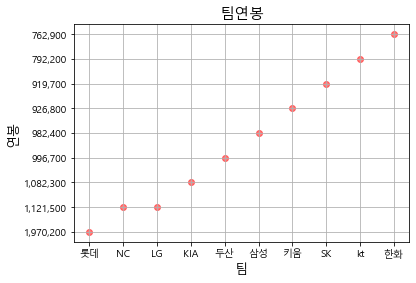

In [13]:
plt.title("팀연봉", fontsize=15)
plt.scatter(team_salary["팀"], team_salary["TOP25 연봉"], color='r', alpha=.5)
plt.xlabel("팀", fontsize=13)
plt.ylabel("연봉", fontsize=13) 
plt.grid()
plt.show()

개인 선수 들의 연봉을 알아보겠습니다.

In [14]:
lt_salary = pd.read_csv("Documents/lt_Salary.csv", encoding = 'cp949')
lt_salary

,선수,연도,팀,연봉(만원),WAR
0,이대호,2020,롯데,"250,000",1.134
1,손아섭,2020,롯데,"200,000",4.210
2,민병헌,2020,롯데,"125,000",-1.277
3,전준우,2020,롯데,"50,000",3.115
4,스트레일리,2020,롯데,"50,000",7.487
...,...,...,...,...,...
68,박재민,2020,롯데,"2,700",NaN
69,최준용,2020,롯데,"2,700",0.531
70,홍민기,2020,롯데,"2,700",NaN
71,배장호,2020,롯데,"2,700",NaN


In [17]:
lt_salary.iloc[0:5]

,선수,연도,팀,연봉(만원),WAR
0,이대호,2020,롯데,"250,000",1.134
1,손아섭,2020,롯데,"200,000",4.210
2,민병헌,2020,롯데,"125,000",-1.277
3,전준우,2020,롯데,"50,000",3.115
4,스트레일리,2020,롯데,"50,000",7.487


Text(0, 0.5, '선수')

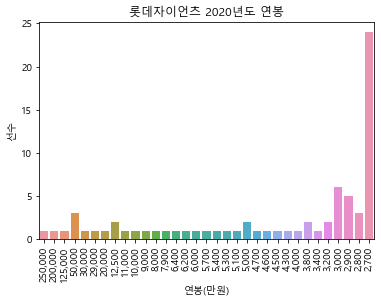

In [15]:
plt.xticks(rotation=90) 
sns.countplot(x="연봉(만원)", data=lt_salary)
plt.title("롯데자이언츠 2020년도 연봉")
plt.xlabel("연봉(만원)")
plt.ylabel("선수")

개인 연봉 순위

In [18]:
player_salary = pd.read_csv("Documents/player_salary.csv", encoding = 'cp949')
player_salary

,선수,연도,팀,연봉(만원),WAR
0,이대호,2020,롯데,"250,000",1.132
1,양현종,2020,KIA,"230,000",2.557
2,양의지,2020,NC,"200,000",6.273
3,손아섭,2020,롯데,"200,000",4.191
4,박병호,2020,넥센,"200,000",1.830
...,...,...,...,...,...
94,이재학,2020,NC,"27,500",-0.497
95,이영하,2020,두산,"27,000",1.986
96,최주환,2020,두산,"27,000",3.647
97,송은범,2020,LG,"27,000",0.809


In [20]:
player_salary.iloc[0:10]

,선수,연도,팀,연봉(만원),WAR
0,이대호,2020,롯데,"250,000",1.132
1,양현종,2020,KIA,"230,000",2.557
2,양의지,2020,NC,"200,000",6.273
3,손아섭,2020,롯데,"200,000",4.191
4,박병호,2020,넥센,"200,000",1.830
5,최형우,2020,KIA,"150,000",5.658
6,김현수,2020,LG,"130,000",5.388
7,이재원,2020,SK,"130,000",-0.575
8,강민호,2020,삼성,"125,000",3.152
9,민병헌,2020,롯데,"125,000",-1.284


top10위 안에만 해도 롯데자이언츠 선수들 3명이 있다.

In [25]:
player_salary.columns

Index(['선수', '연도', '팀', '연봉(만원)', 'WAR'], dtype='object')

In [21]:
ps = player_salary.iloc[0:10]

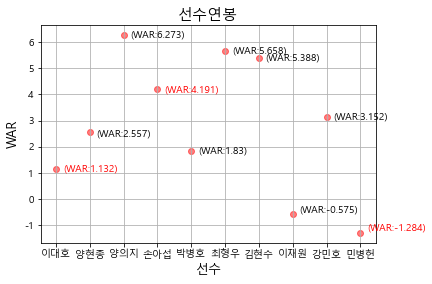

In [23]:
plt.title("선수연봉", fontsize=15)
plt.scatter(ps["선수"], ps["WAR"], color='r', alpha=.5)
plt.xlabel("선수", fontsize=13)
plt.ylabel("WAR", fontsize=13)
plt.text(0.2, 1.05, "(WAR:1.132)" , color ='r')
plt.text(1.2, 2.4, "(WAR:2.557)")
plt.text(2.2, 6.173, "(WAR:6.273)")
plt.text(3.2, 4.091, "(WAR:4.191)", color = 'r')
plt.text(4.2, 1.73, "(WAR:1.83)")
plt.text(5.2, 5.558 ,"(WAR:5.658)")
plt.text(6.2, 5.288 ,"(WAR:5.388)")
plt.text(7.2, -0.5 ,"(WAR:-0.575)")
plt.text(8.2, 3.052 ,"(WAR:3.152)")
plt.text(9.2, -1.2 ,"(WAR:-1.284)", color ='r')
plt.grid()
plt.show()

앞에서 보는거 같이 팀의 연봉이 제일 높은 와중에도 이대호 선수와 민병헌 선수는 연봉에 비해 경기 영향력이 없다는걸 알 수 있습니다.

# <Step1.탐색> 롯데자이언츠는 왜 야구를 못할까?

[2020년 프로야구 전체 데이터셋]

먼저 2020년 프로야구 전체 데이터셋으로 비교하여 보았습니다.

In [30]:
team_batter = pd.read_csv("Documents/team_batter.csv", encoding = 'cp949')
team_batter

,순,이름,팀,정렬,G,타석,타수,득점,안타,2타,...,희타,희비,타율,출루,장타,OPS,wOBA,wRC+,WAR*,WPA
0,1,NC,20,32.73,1951,5757,5033,879,1467,256,...,46,50,0.291,0.367,0.463,0.830,0.370,114.6,32.73,17.71
1,2,두산,20,30.82,1863,5687,4967,802,1454,262,...,38,73,0.293,0.365,0.426,0.791,0.358,114.0,30.82,13.03
2,3,LG,20,27.28,1954,5605,4928,795,1365,250,...,47,48,0.277,0.350,0.430,0.780,0.350,109.4,27.28,9.28
3,4,키움,20,26.45,1740,5638,4879,746,1316,250,...,42,50,0.270,0.354,0.408,0.762,0.347,104.9,26.45,9.67
4,5,KT,20,26.33,1971,5674,4974,793,1409,236,...,63,43,0.283,0.357,0.437,0.794,0.356,106.6,26.33,14.94
5,6,롯데,20,20.55,1745,5669,4958,750,1366,252,...,39,48,0.276,0.354,0.408,0.762,0.346,99.5,20.55,10.01
6,7,KIA,20,18.52,1807,5637,4933,724,1353,224,...,63,38,0.274,0.351,0.404,0.755,0.343,98.1,18.52,8.55
7,8,삼성,20,15.78,1853,5537,4889,697,1310,208,...,50,53,0.268,0.338,0.395,0.733,0.333,90.8,15.78,-0.31
8,9,SK,20,9.63,1870,5417,4767,621,1188,175,...,48,33,0.249,0.327,0.381,0.709,0.322,84.3,9.63,-2.48
9,10,한화,20,4.50,1873,5439,4823,542,1176,195,...,45,25,0.244,0.319,0.337,0.657,0.305,76.5,4.50,-12.48


먼저 야구 타자를 비교하였을때는 정렬(WAR):대체 선수 대비 승리 기여, OPS는 장타율과 출루율을 합치는 값을 의미합니다. 그래서 타자들에게 제일 중요한 WAR과 OPS를 비교하여 나타내었습니다. 

In [31]:
team_batter.columns

Index(['순', '이름', '팀', '정렬', 'G', '타석', '타수', '득점', '안타', '2타', '3타', '홈런',
       '루타', '타점', '도루', '도실', '볼넷', '사구', '고4', '삼진', '병살', '희타', '희비', '타율',
       '출루', '장타', 'OPS', 'wOBA', 'wRC+', 'WAR*', 'WPA'],
      dtype='object')

In [32]:
print(team_batter.shape)

(10, 31)


In [33]:
team_batter["OPS"].describe()

count    10.000000
mean      0.757300
std       0.048667
min       0.657000
25%       0.738500
50%       0.762000
75%       0.788250
max       0.830000
Name: OPS, dtype: float64

In [34]:
team_batter["순"].describe()

count    10.00000
mean      5.50000
std       3.02765
min       1.00000
25%       3.25000
50%       5.50000
75%       7.75000
max      10.00000
Name: 순, dtype: float64

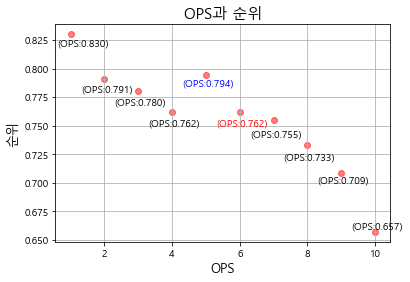

In [35]:
plt.title("OPS과 순위", fontsize=15)
plt.scatter(team_batter["순"], team_batter["OPS"], color='r', alpha=.5)
plt.xlabel("OPS", fontsize=13)
plt.ylabel("순위", fontsize=13)
plt.text(0.6,0.820, "(OPS:0.830)")
plt.text(1.3,0.780, "(OPS:0.791)")
plt.text(2.3,0.768, "(OPS:0.780)")
plt.text(3.3,0.750, "(OPS:0.762)")
plt.text(4.3,0.785, "(OPS:0.794)", color ='b')
plt.text(5.3,0.750, "(OPS:0.762)", color ='r')
plt.text(6.3,0.740, "(OPS:0.755)")
plt.text(7.3,0.720, "(OPS:0.733)")
plt.text(8.3,0.700, "(OPS:0.709)")
plt.text(9.3,0.660, "(OPS:0.657)")
plt.grid()
plt.show()

OPS가 높은 순으로 순위가 나타는게 아니라는 사실을 알게 되었다.

In [36]:
team_batter["정렬"].describe()

count    10.000000
mean     21.259000
std       9.225764
min       4.500000
25%      16.465000
50%      23.440000
75%      27.072500
max      32.730000
Name: 정렬, dtype: float64

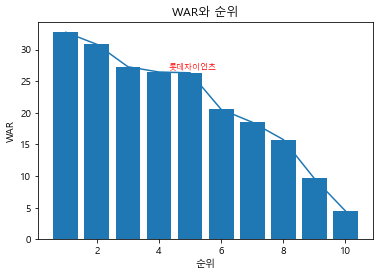

In [37]:
plt.title('WAR와 순위')
plt.xlabel('순위')
plt.ylabel('WAR')
plt.plot(team_batter['순'], team_batter['정렬'])
plt.bar(team_batter['순'], team_batter['정렬'])
plt.text(4.3,27, "롯데자이언츠", color = 'r', fontsize = 8)
plt.show()

WAR과 OPS를 순위와 비교를 해봤을때, WAR은 높은순으로 순위가 매겨지고있고, OPS 같은 경우는 OPS가 높다고 순위가 높다고 할수 없다는걸 나타낸다.
여기서 롯데자이언츠의  WAR과 OPS는 5위정도의 영향력이 있다.

다음은 투수를 보겠습니다.

In [38]:
team_picher = pd.read_csv("Documents/team_picher.csv", encoding = 'cp949')
team_picher

,순,이름,팀,WAR,출장,완투,완봉,선발,승,패,...,삼진,보크,폭투,ERA,FIP,WHIP,ERA+,FIP+,WAR.1,WPA
0,1,두산,20,21.10,648,1,0,142,77,60,...,1036,4,52,4.37,4.21,1.45,105.6,109.5,21.10,-4.22
1,2,NC,20,19.46,725,0,0,142,82,54,...,1037,7,64,4.53,4.89,1.41,108.0,98.8,19.46,-3.25
2,3,롯데,20,19.31,689,1,0,144,71,72,...,1002,4,62,4.64,4.56,1.41,104.6,105.1,19.31,-10.70
3,4,삼성,20,19.06,694,3,1,143,64,74,...,924,5,55,4.75,5.03,1.47,103.7,97.3,19.06,-4.54
4,5,KIA,20,18.09,639,1,1,144,73,70,...,1038,4,78,5.14,4.61,1.54,93.6,104.4,18.09,-7.30
5,6,KT,20,17.70,657,0,0,142,80,61,...,841,1,75,4.58,4.71,1.46,104.2,100.7,17.70,-5.52
6,7,키움,20,17.59,720,0,0,142,78,63,...,934,7,51,4.41,4.56,1.40,106.3,101.8,17.59,-2.03
7,8,LG,20,15.87,643,2,2,142,79,59,...,1005,4,48,4.36,4.51,1.42,105.8,102.2,15.87,0.66
8,9,한화,20,11.91,701,1,1,143,45,95,...,1010,5,77,5.32,5.16,1.59,89.0,92.6,11.91,-12.57
9,10,SK,20,8.45,678,1,0,142,50,91,...,941,5,83,5.58,5.46,1.60,86.3,89.2,8.45,-18.48


투수에게도 중요한건 WAR과 ERA(방어율),WPA(승리기여도)이 중요합니다.
투수의 WAR, ERA, WPA를 비교하여 나타내었습니다. 

In [39]:
team_picher.columns

Index(['순', '이름', '팀', 'WAR', '출장', '완투', '완봉', '선발', '승', '패', '세', '홀드',
       '이닝', '실점', '자책', '타자', '안타', '2타', '3타', '홈런', '볼넷', '고4', '사구', '삼진',
       '보크', '폭투', 'ERA', 'FIP', 'WHIP', 'ERA+', 'FIP+', 'WAR.1', 'WPA'],
      dtype='object')

In [40]:
print(team_picher.shape)

(10, 33)


In [41]:
team_picher["WAR"].describe()

count    10.000000
mean     16.854000
std       3.866406
min       8.450000
25%      16.300000
50%      17.895000
75%      19.247500
max      21.100000
Name: WAR, dtype: float64

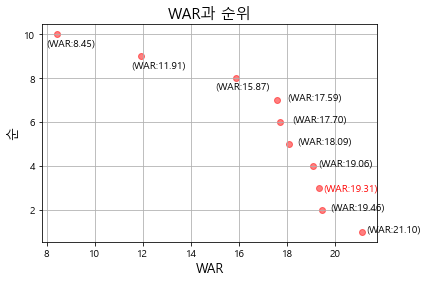

In [42]:
plt.title("WAR과 순위", fontsize=15)
plt.scatter(team_picher["WAR"], team_picher["순"], color='r', alpha=.5)
plt.xlabel("WAR", fontsize=13)
plt.ylabel("순", fontsize=13)
plt.text(8,9.5, "(WAR:8.45)")
plt.text(11.5,8.5, "(WAR:11.91)")
plt.text(15,7.5, "(WAR:15.87)")
plt.text(18,7, "(WAR:17.59)")
plt.text(18.2,6, "(WAR:17.70)")
plt.text(18.4,5, "(WAR:18.09)")
plt.text(19.3,4, "(WAR:19.06)")
plt.text(19.5,2.9, "(WAR:19.31)" , color = 'r')
plt.text(19.8,2, "(WAR:19.46)")
plt.text(21.3,1, "(WAR:21.10)")

plt.grid()
plt.show()

롯데 자이언츠 투수 WAR은 팀 전체 중 3위에 포함된다.

In [43]:
team_picher["ERA"].describe()

count    10.000000
mean      4.768000
std       0.430008
min       4.360000
25%       4.440000
50%       4.610000
75%       5.042500
max       5.580000
Name: ERA, dtype: float64

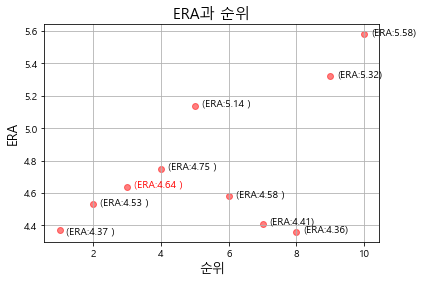

In [44]:
plt.title("ERA과 순위", fontsize=15)
plt.scatter(team_picher["순"], team_picher["ERA"], color='r', alpha=.5)
plt.xlabel("순위", fontsize=13)
plt.ylabel("ERA", fontsize=13)
plt.text(1.2,4.35, "(ERA:4.37 )")
plt.text(2.2,4.53, "(ERA:4.53 )")
plt.text(3.2,4.64, "(ERA:4.64 )", color = 'r')
plt.text(4.2,4.75, "(ERA:4.75 )")
plt.text(5.2,5.14, "(ERA:5.14 )")
plt.text(6.2,4.58, "(ERA:4.58 )")
plt.text(7.2,4.41, "(ERA:4.41)")
plt.text(8.2,4.36, "(ERA:4.36)")
plt.text(9.2,5.32, "(ERA:5.32)")
plt.text(10.2,5.58, "(ERA:5.58)")
plt.grid()
plt.show()

팀 방어율 에서는 방어율이 팀 전체 중에 6위를 차지 하고있습니다.

In [45]:
team_picher["WPA"].describe()

count    10.000000
mean     -6.795000
std       5.672394
min     -18.480000
25%      -9.850000
50%      -5.030000
75%      -3.492500
max       0.660000
Name: WPA, dtype: float64

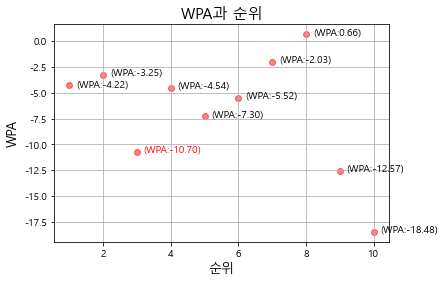

In [46]:
plt.title("WPA과 순위", fontsize=15)
plt.scatter(team_picher["순"], team_picher["WPA"], color='r', alpha=.5)
plt.xlabel("순위", fontsize=13)
plt.ylabel("WPA", fontsize=13)
plt.text(1.2,-4.42, "(WPA:-4.22)")
plt.text(2.2,-3.25, "(WPA:-3.25)")
plt.text(3.2,-10.70, "(WPA:-10.70)", color ='r')
plt.text(4.2,-4.54, "(WPA:-4.54)")
plt.text(5.2,-7.30, "(WPA:-7.30)")
plt.text(6.2,-5.52, "(WPA:-5.52)")
plt.text(7.2,-2.03, "(WPA:-2.03)")
plt.text(8.2,0.66, "(WPA:0.66)")
plt.text(9.2,-12.57, "(WPA:-12.57)")
plt.text(10.2,-18.48, "(WPA:-18.48)")
plt.grid()
plt.show()

롯데자이언츠는 WAR과 ERA는 무난하게 좋습니다. 
하지만 WPA 즉, 투수 승리기여도가 전체 10팀중에 하위 3위라는 점에서 
투수들이 주는 승리는 별로 없다 라고 알수 있습니다. 항상 마지막에 투수들이 역전을 줘서 그렇겠죠~?

다음은 수비를 알아보겠습니다.

In [48]:
team_defence = pd.read_csv("Documents/team_defence.csv", encoding = 'cp949')
team_defence


,순,이름,팀,정렬,출장,선발,이닝,기회,자살,보살,실책,수비율,RF9,RNG,ARM,CS,BLK,E+,RAA
0,1,LG,21,1.443,536,315,2772,1319,925,369,25,0.981,4.20,15.34,-0.52,-0.64,0.15,0.58,14.90
1,2,키움,21,0.936,528,317,2898,1371,966,375,30,0.978,4.17,7.19,2.93,-0.07,-0.19,-0.17,9.70
2,3,KT,21,0.810,531,314,2751,1332,917,381,34,0.975,4.25,6.73,3.55,-0.74,-0.06,-1.27,8.22
3,4,한화,21,0.580,459,314,2754,1250,918,303,29,0.977,3.99,7.63,-0.72,-0.93,0.27,-0.26,5.99
4,5,두산,21,0.048,516,306,2739,1280,913,340,27,0.979,4.12,2.49,-2.87,0.61,0.06,0.11,0.41
5,6,KIA,21,-0.523,510,315,2859,1332,953,358,21,0.984,4.13,-5.79,-1.13,-0.39,0.13,1.55,-5.64
6,7,NC,21,-0.547,552,315,2781,1267,926,312,29,0.977,4.01,-6.89,0.15,0.93,0.28,-0.20,-5.72
7,8,SSG,21,-0.691,510,306,2727,1261,909,317,35,0.972,4.05,-8.89,2.67,0.38,-0.21,-1.51,-7.56
8,9,삼성,21,-0.878,547,324,2841,1274,947,304,23,0.982,3.96,-8.04,-2.31,-0.13,-0.08,1.12,-9.44
9,10,롯데,21,-1.149,503,314,2811,1322,937,357,28,0.979,4.14,-9.77,-1.75,-0.45,-0.36,0.06,-12.28


수비에서 중요한 것은 정렬(WAA): 평균선수대비 수비 승리 기여도 와 팀 수비율입니다.

In [49]:
team_defence.columns

Index(['순', '이름', '팀', '정렬', '출장', '선발', '이닝', '기회', '자살', '보살', '실책', '수비율',
       'RF9', 'RNG', 'ARM', 'CS', 'BLK', 'E+', 'RAA'],
      dtype='object')

In [50]:
print(team_defence.shape)

(10, 19)


In [51]:
team_defence["정렬"].describe()

count    10.000000
mean      0.002900
std       0.887842
min      -1.149000
25%      -0.655000
50%      -0.237500
75%       0.752500
max       1.443000
Name: 정렬, dtype: float64

In [52]:
team_defence["정렬"]

0    1.443
1    0.936
2    0.810
3    0.580
4    0.048
5   -0.523
6   -0.547
7   -0.691
8   -0.878
9   -1.149
Name: 정렬, dtype: float64

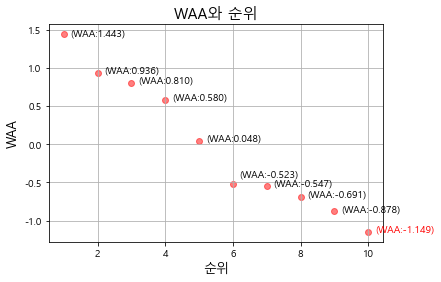

In [53]:
plt.title("WAA와 순위", fontsize=15)
plt.scatter(team_defence["순"], team_defence["정렬"], color='r', alpha=.5)
plt.xlabel("순위", fontsize=13)
plt.ylabel("WAA", fontsize=13)
plt.text(1.2,1.42, "(WAA:1.443)")
plt.text(2.2,0.936, "(WAA:0.936)")
plt.text(3.2,0.810, "(WAA:0.810)")
plt.text(4.2,0.580, "(WAA:0.580)")
plt.text(5.2,0.048, "(WAA:0.048)")
plt.text(6.2,-0.423, "(WAA:-0.523)")
plt.text(7.2,-0.547, "(WAA:-0.547)")
plt.text(8.2,-0.691, "(WAA:-0.691)")
plt.text(9.2,-0.878, "(WAA:-0.878)")
plt.text(10.2,-1.149, "(WAA:-1.149)", color = 'r')
plt.grid()
plt.show()

In [54]:
team_defence["수비율"].describe()

count    10.000000
mean      0.978400
std       0.003471
min       0.972000
25%       0.977000
50%       0.978500
75%       0.980500
max       0.984000
Name: 수비율, dtype: float64

In [55]:
team_defence["수비율"]

0    0.981
1    0.978
2    0.975
3    0.977
4    0.979
5    0.984
6    0.977
7    0.972
8    0.982
9    0.979
Name: 수비율, dtype: float64

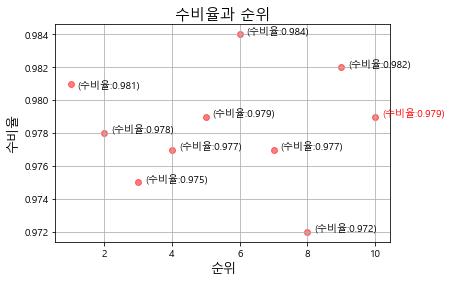

In [56]:
plt.title("수비율과 순위", fontsize=15)
plt.scatter(team_defence["순"], team_defence["수비율"], color='r', alpha=.5)
plt.xlabel("순위", fontsize=13)
plt.ylabel("수비율", fontsize=13)
plt.text(1.2,0.9807,"(수비율:0.981)")
plt.text(2.2,0.978,"(수비율:0.978)")
plt.text(3.2,0.975,"(수비율:0.975)")
plt.text(4.2,0.977,"(수비율:0.977)")
plt.text(5.2,0.979,"(수비율:0.979)")
plt.text(6.2,0.984,"(수비율:0.984)")
plt.text(7.2,0.977,"(수비율:0.977)")
plt.text(8.2,0.972,"(수비율:0.972)")
plt.text(9.2,0.982,"(수비율:0.982)")
plt.text(10.2,0.979,"(수비율:0.979)", color = 'r')
plt.grid()
plt.show()

수비율은 공동 4위를 나타낸다.

마지막으로 롯데 자이언츠 개인 순위를 통해 무엇이 문제인지 알아보겠습니다.

In [58]:
lt_total= pd.read_csv("Documents/lt_total.csv", encoding = 'cp949')
lt_total

롯데자이언츠 개인 순위

In [70]:
lt_total.iloc[0:9]

,순,이름,팀,WAR,타격,도루,주루,수비,Wins,Wins.1,선발,구원,선발.1,구원.1,선발.2,구원.2
0,1.0,스트레일리,20롯P,7.49,0.00,0.00,0.00,0.00,0.00,0.00,4.89,0.00,2.60,0.00,7.49,0.00
1,2.0,마차도,20롯SS,4.53,0.16,0.24,-0.07,1.28,2.33,0.60,0.00,0.00,0.00,0.00,0.00,0.00
2,3.0,손아섭,20롯RF,4.21,2.95,0.09,0.01,-0.72,2.55,-0.67,0.00,0.00,0.00,0.00,0.00,0.00
3,4.0,한동희,20롯3B,3.18,0.54,-0.14,-0.21,0.71,2.21,0.06,0.00,0.00,0.00,0.00,0.00,0.00
4,5.0,전준우,20롯LF,3.11,1.00,-0.13,0.22,0.06,2.62,-0.65,0.00,0.00,0.00,0.00,0.00,0.00
5,6.0,정훈,20롯CF,2.29,0.91,0.16,0.06,-0.40,1.98,-0.42,0.00,0.00,0.00,0.00,0.00,0.00
6,7.0,박세웅,20롯P,1.98,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,1.96,0.00,1.98,0.00
7,8.0,구승민,20롯P,1.91,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.10,0.00,0.80,0.00,1.91
8,9.0,노경은,20롯P,1.66,0.00,0.00,0.00,0.00,0.00,0.00,0.20,-0.31,1.76,0.02,1.95,-0.29


In [71]:
lt = lt_total.iloc[0:9]

plt.title("2020년도 롯데 자이언츠", fontsize=15)
plt.scatter(lt["이름"], lt["WAR"], color='r', alpha=.5)
plt.xlabel("선수", fontsize=13)
plt.ylabel("WAR", fontsize=13)
plt.grid()
plt.show()

2020년도 전체 연봉 순위


In [74]:
player_salary.iloc[0:10]

,선수,연도,팀,연봉(만원),WAR
0,이대호,2020,롯데,"250,000",1.132
1,양현종,2020,KIA,"230,000",2.557
2,양의지,2020,NC,"200,000",6.273
3,손아섭,2020,롯데,"200,000",4.191
4,박병호,2020,넥센,"200,000",1.830
5,최형우,2020,KIA,"150,000",5.658
6,김현수,2020,LG,"130,000",5.388
7,이재원,2020,SK,"130,000",-0.575
8,강민호,2020,삼성,"125,000",3.152
9,민병헌,2020,롯데,"125,000",-1.284


이대호 선수와 민병헌 선수가 연봉에 비해 승리 기여도가 없다. 즉 성적이 부진 하다고 나타내주고 있어 참 안타까운 상황입니다.

이렇게 많은 데이터를 분석해서 롯데 자이언츠의 문제점을 알아 보았는데요. 제가 분석해 본 결과 타자는 연봉에 비해 성적이 부진한 선수가 너무 많고,
투수는 방어율은 나쁘지 않지만, 승리 기여도가 낮은것을 보아 이기고 있을때, 집중력이 부족하지않나 생각이들고, 수비는 말할것도 없이 많이 연습을 해야된다고 생각이 듭니다.
만약 제가 롯데 자이언츠의 분석가가 된다면, 데이터 분석을 통해 선수들이 필요한 훈련이 무엇인지 파악해서 지적해주고 문제점을 해결 할 수 있게 도와주고 싶습니다.

특별히 어려웠던 점은 야구의 언어가 너무 많아 수많은 데이터를 찾고 정리하기가 어려웠고, 전처리 과정에서 어떤 전처리가 좋은지 잘 모르겠습니다.하하하
그리고 야구안에 투수 타자 수비수 이 셋이 너무 중요해서 시각화를 세개 다 하다보니 너무 정신이 없었습니다.

지금까지 발표를 한 정영준 이였습니다ㅣ. 감사합니다~